In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
from sklearn.model_selection import train_test_split #to split data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [4]:
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(X.head())
y = pd.DataFrame(data=iris.target, columns = ['irisType'])
print(y.head())
y.irisType.value_counts()

print(X.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   irisType
0         0
1         0
2         0
3         0
4         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [7]:
y.irisType.value_counts()

2    50
1    50
0    50
Name: irisType, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(y_train[:5,:])

X_train = X_train.values
X_test = X_test.values
print(X_train[0])

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[6.5 3.  5.8 2.2]


In [8]:
# model2 = Sequential()
# model2.add(Dense(64, activation = 'relu', input_shape= X_train[0].shape))
# model2.add( Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add(tf.keras.layers.Dropout(0.5))
# model2.add( Dense (128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add(tf.keras.layers.Dropout(0.5))
# model2.add( Dense (64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (3, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

model2 = Sequential()
model2.add(Dense(8, activation = 'relu', input_shape= X_train[0].shape))
model2.add( Dense(16, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add( Dense (16, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model2.add( Dense (3, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [9]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history2 = model2.fit(X_train, y_train, epochs=800, validation_split=0.1, batch_size=40)

Epoch 1/800
4/4 [==============================] - 1s 76ms/step - loss: 2.4783 - acc: 0.2893 - val_loss: 1.3347 - val_acc: 0.3571
Epoch 2/800
4/4 [==============================] - 0s 7ms/step - loss: 2.0523 - acc: 0.3058 - val_loss: 1.2599 - val_acc: 0.3571
Epoch 3/800
4/4 [==============================] - 0s 7ms/step - loss: 1.9507 - acc: 0.3140 - val_loss: 1.2008 - val_acc: 0.3571
Epoch 4/800
4/4 [==============================] - 0s 8ms/step - loss: 1.6737 - acc: 0.2975 - val_loss: 1.1667 - val_acc: 0.3571
Epoch 5/800
4/4 [==============================] - 0s 9ms/step - loss: 1.6228 - acc: 0.2975 - val_loss: 1.1514 - val_acc: 0.3571
Epoch 6/800
4/4 [==============================] - 0s 8ms/step - loss: 1.5818 - acc: 0.3967 - val_loss: 1.1425 - val_acc: 0.2143
Epoch 7/800
4/4 [==============================] - 0s 7ms/step - loss: 1.5173 - acc: 0.2810 - val_loss: 1.1371 - val_acc: 0.4286
Epoch 8/800
4/4 [==============================] - 0s 8ms/step - loss: 1.3454 - acc: 0.3719 - va

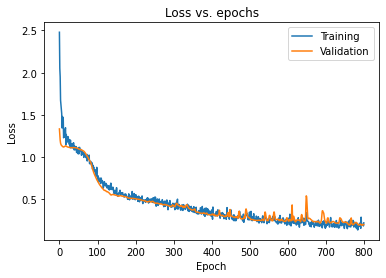

In [10]:
plt.plot(history2.history['loss'])

plt.plot(history2.history['val_loss'])

plt.title('Loss vs. epochs')

plt.ylabel('Loss')

plt.xlabel('Epoch')

plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()


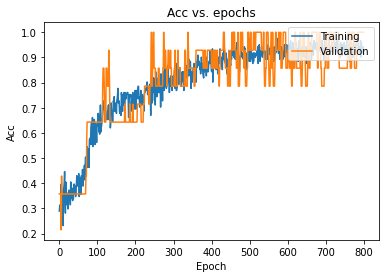

In [11]:
plt.plot(history2.history['acc'])

plt.plot(history2.history['val_acc'])

plt.title('Acc vs. epochs')

plt.ylabel('Acc')

plt.xlabel('Epoch')

plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()


In [16]:
predictedTests = model2.predict_classes(X_test)
predictedTests

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1])

In [22]:
[np.where(r==1)[0][0] for r in y_test]

[1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1]

In [28]:
result = pd.DataFrame([np.where(r==1)[0][0] for r in y_test], columns=['GT'])
result['Predictions'] = predictedTests 
pd.crosstab(result.iloc[:,0], result.iloc[:,1])

Predictions,0,1,2
GT,,,
0,4,0,0
1,0,8,1
2,0,0,2
